In [3]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

Technique for fitting when:
* more data points than fit function parameters
* want to take into account individual errors on points
* want a measure of the quality of a fit

Most common is some version of...

## Least Squares Fitting (and some matrix computing)

Need a quantity to minimize:

$$
 \chi^{2}  =  \sum_{i=1}^{N_{D}}
\left(\frac{y_{i} - g(x_{i}, a_m)} {\sigma_{i}}\right)^{2}$$

where the $\sigma_{i}$ are the errors on each data point, $y_i$, and the fit function, $g$, has ("internal") parameters, $a_m$.

*Least-squares fitting*: 
* adjust the parameters $a_m$ in the theory until a minimum in $\chi^2$ is found, that is, finding a curve that produces the least value for the summed squares of the deviations of the data from the function $g(x)$, weighted by the error for each data point. 

Note: $g$ not necessarily linear in the $a_m$. 
* In that case, it is still possible to find parameter values that minimize the $\chi^2$ by using a trial-and-error method (*e.g.*, gradient sensing, following the idea behind Newton-Raphson) in a multi-dimensional space. 


#### Linear case

The function being fitted depends only *linearly* on the unknown parameters $a_m$. Then,
* minimumization condition for $\chi^2$ leads to a set of simultaneous linear equations for the $a_m$ that can be solved using numerical matrix techniques.

For example, a fit to 

$$g(x) = a_1 + a_2x + a_3x^{2}$$

is linear: although $x$ is raised to the second power, the dependence on the $a_m$ parameters is entirely linear.

The $\chi^2$ minimization leads to the
three simultaneous equations for the three $a_m$ (see your textbook section 7.8.1):

$$\begin{align}
\sum_{i=1}^{N_{D}}  \frac{[y_{i}-g(x_{i})]}{\sigma_{i}^{2}}
\frac{\partial g(x_i)} {\partial a_{1}} & =  0, \quad
\frac{\partial g}{\partial a_1} =1,\\
\sum_{i=1}^{N_{D}}  \frac{[y_{i}-g(x_{i})]}{\sigma_{i}^{2}}
\frac{\partial g(x_i)} {\partial a_{2}} & =  0, \quad \frac{\partial g}{\partial a_2} =
x,\\
\sum_{i=1}^{N_{D}}   \frac{[y_{i}-g(x_{i})]}{\sigma_{i}^{2}}
 \frac{\partial g(x_i)} {\partial a_{3}} & =  0 , \quad \frac{\partial g}{\partial
 a_3}=x^2
\end{align}$$
 
The key here is that all of these equations are linear in $x_1, x_2, \dots, x_N$, so we can write the system of equations in matrix form.

The system of equations:
$$\begin{align}
S a_1 + S_{x}a_2 + S_{xx}a_3 & = S_{y}, \\ S_{x}a_1 + S_{xx} a_2 + S_{xxx} a_3 & =
S_{xy}, \\ S_{xx} a_1 + S_{xxx} a_2 + S_{xxxx} a_3 & = S_{xxy} \end{align}$$

can be converted to matrix form with unknown parameter values $a_m$ collected in vector $\bf x$:

$$\begin{align}
 &{\bf A}{\bf x}  = {\bf b},  \\
 & \\
 &{\bf A}  = \left[\begin{array}{lll}
S & S_{x} & S_{xx}\\
 S_{x} & S_{xx} & S_{xxx} \\
 S_{xx} & S_{xxx} & S_{xxxx}\end{array} \right]\!,\quad
 {\bf x} =
\left[\begin{array}{l}
a_1\\ a_2\\ a_3\end{array} \right]\!,\quad {\bf b} =
\left[\begin{array}{l} S_{y}\\ S_{xy}\\ S_{xxy}
\end{array} \right]
\end{align}$$

where all those $S$s are defined in your textbook in equations (7.47) through (7.52). Also see section 7.8.1. 
The solution for $\bf x$ is obtained by solving the equation computationally.

Once we have the parameter values $a_m$, we have the complete function of the fitted curve 
$$g(x) = a_1 + a_2x + a_3x^{2}$$ for any set of $x$ values.

...so, HOW do we do matrix calculations on a computer? In particular, how do we solve for the unknown vector $\bf x$? We must digress:

---------------------------------
--------
------

## Matrix computing

See Chapter 6 of your book. 

Represent matrices as NumPy arrays.
* The NumPy package converts Python lists to proper arrays with the `array` function.
* The NumPy `linalg` package contains all of the linear algebra operations.

List of NumPy operators and their effects.

|*Operator* | *Effect*|*Operator*|*Effect*| 
|- - -|- - - |- - -|- - - | 
|dot(a,b\[,out\]) | Dot product arrays | vdot(a, b) | Dot product | 
|inner(a, b) | Inner product arrays |outer(a, b) | Outer product | 
|tensordot(a, b) | Tensor dot product | einsum( ) |Einstein sum | 
|linalg.matrix_power(M, n) | Matrix to power n | kron(a, b) | Kronecker product| 
|linalg.cholesky(a) | Cholesky decomp |linalg.qr(a)| QR factorization | 
|linalg.svd(a ) | Singular val decomp |linalg.eig(a) | Eigenproblem | 
|linalg.eigh(a) | Hermitian eigen |linalg.eigvals(a)| General eigen |
|linalg.eigvalsh(a) | Hermitian eigenvals |linalg.norm(x) |Matrix norm | 
|linalg.cond(x) | Condition number |linalg.det(a) | Determinant | 
|linalg.slogdet(a) | Sign & log(det) |trace(a) | Diagnol sum | 
|linalg.solve(a, b) | Solve equation |linalg.tensorsolve(a, b) | Solve a x = b | 
|linalg.lstsq(a, b) |Least-squares solve |linalg.inv(a) | Inverse | 
|linalg.pinv(a) | Penrose inverse|linalg.tensorinv(a)| Inverse N-D array |

Many similar packages, including in other languages, are based on the standard [LAPACK libraries](http://www.netlib.org/lapack/). 

-------
-------
Here's an example that is familiar:

<img src="Figures/Resistor_Network.png" width="30%">

Kirchhoff's laws:
$$
\left(
\begin{array}{c}
I_1 + I_2 + I_3 \\
-2 I_1 + 3 I_2 \\
-3 I_2 + 6 I_3
\end{array}
\right)
= 
\left(
\begin{array}{c}
0 \\
24 \\
0
\end{array}
\right)
$$

By inspection, we would expect $I_1$ to be negative. Let's see that happen (we don't have to put it in by hand, the algebra will tell us).

Such a system can be written in matrix form $\bf{Ax} = \bf{b}$

$$
\begin{bmatrix}
    1 & 1 & 1 \\
    -2 & 3 & 0 \\
    0 & -3 & 6
\end{bmatrix}
\left[
\begin{array}{c}
I_1 \\
I_2 \\
I_3
\end{array}
\right]
=
\begin{bmatrix}
0 \\
24 \\
0
\end{bmatrix}
$$

And tell numpy to solve it:

In [6]:
from numpy.linalg import inv
from numpy.linalg import solve
inputs = np.array([1., 1., 1., -2., 3., 0., 0., -3., 6.])  # just enter the elements row-wise, then
#
A = inputs.reshape(3,3)     # reshape to construct the matrix. See next cell to ensure we got it right.
#
inputs = np.array([0., 24., 0])
b = inputs.reshape(3,1)  # construct the column vector
x = np.linalg.solve(A,b)  # magic!
print("I1= %.1f   I2= %.1f    and I3= %.1f"%(x[0],x[1],x[2]))


I1= -6.0   I2= 4.0    and I3= 2.0


In [12]:
# let's have a look at some quantities:
print("A is\n", A)
print("\n Transpose:\n",A.T)
print("\n determinant of A:\n", np.linalg.det(A))
print("\n this is an important test: see if the inverse of A is correctly calculated by multipying A and A inverse:")
print(np.dot(A,inv(A)))
print("put the solution back into the equation:\n\n", np.dot(A,x))

A is
 [[ 1.  1.  1.]
 [-2.  3.  0.]
 [ 0. -3.  6.]]

 Transpose:
 [[ 1. -2.  0.]
 [ 1.  3. -3.]
 [ 1.  0.  6.]]

 determinant of A:
 36.0

 this is an important test: see if the inverse of A is correctly calculated by multipying A and A inverse:
[[ 1.00000000e+00 -1.38777878e-17  2.77555756e-17]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-5.55111512e-17 -2.77555756e-17  1.00000000e+00]]
put the solution back into the equation:

 [[ 0.]
 [24.]
 [ 0.]]


That's great!! 

(BTW, these techniques are also useful for finding principal axes (eigenvectors) and accompanying eigenvalues, for example finding moments of inertia. Generalizations have been done for [important discoveries](https://www.sciencedirect.com/science/article/pii/037026937990830X), and for analyzing shapes of energy depositions in detectors.)

....NOW back top our least-squares fit: Let's generate some random data and do a fit, then we'll deliberately tamper with one of the errors and see what happens. Reuse our $x^2$ random number generator from Lectures3. The errors will be the sqrt of the bin contents.

The bin contents: [  2.  28.  82. 161. 227.]
[0.5 1.5 2.5 3.5 4.5]


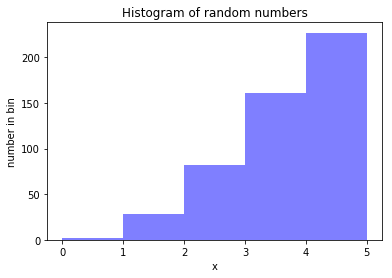

In [25]:
def w(x):
    return (3./pow(5.,3))*x*x

N = 500
ranx2 = np.zeros(N).astype('float')
i=0
while (i<N):
    r1,r2 = 5.*np.random.random(2)
    if (r2<w(r1)):
        ranx2[i]=r1
        i+=1
bins=[0,1,2,3,4,5]
bins=np.arange(0,6,1)
# the histogram of the data
n, binsa, patches = plt.hist(ranx2, bins, facecolor='blue', alpha=0.5, align='mid')
plt.xlabel('x')
print ("The bin contents:",n)
plt.ylabel('number in bin')
plt.title(r'Histogram of random numbers')
print(binsa[:-1]+0.5)
plt.show()

A*inverse(A)
[[ 1.00000000e+00  1.07693674e-15  1.64237651e-16]
 [-7.61153772e-16  1.00000000e+00  6.15955620e-17]
 [-6.05560415e-15 -2.21174684e-17  1.00000000e+00]] 

FitParabola Final Results

y(x) = a0 + a1 x + a2 x^2
a0 = -5.323
a1 = 9.524
a2 = 9.837 



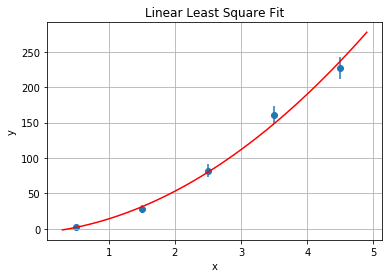

In [26]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed 
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# Fit.py     Linear least square fit; e.g. of matrix computation arrays
	 

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.linalg import solve

x = binsa[:-1]+0.5  # Given x values
y = n*1.      # Given y values
plt.scatter(x, y)                                    # Plot data in blue
sig = np.sqrt(n*1.)      # error bar lenghts
plt.errorbar(x,y,yerr=sig, fmt="none")                                    # Plot error bars
plt.title('Linear Least Square Fit')                     # Plot figure
plt.xlabel( 'x' )                                        # Label axes
plt.ylabel( 'y' )
plt.grid(True)                                           # plot grid
Nd = len(x)
A = np.zeros( (3,3), float )                                # Initialize
bvec = np.zeros( (3,1), float )
ss = sx = sxx = sy = sxxx = sxxxx = sxy = sxy = sxxy = 0.

for i in range(0, Nd):                                      
        sig2 = sig[i] * sig[i]
        ss  += 1. / sig2;    sx   += x[i]/sig2;        sy    += y[i]/sig2
        rhl  = x[i] * x[i];  sxx  += rhl/sig2;   sxxy  += rhl * y[i]/sig2
        sxy += x[i]*y[i]/sig2; sxxx +=rhl*x[i]/sig2; sxxxx +=rhl*rhl/sig2

A    = np.array([ [ss,sx,sxx], [sx,sxx,sxxx], [sxx,sxxx,sxxxx] ])
bvec = np.array([sy, sxy, sxxy])

#xvec = np.dot(inv(A), bvec)                             # Invert matrix
Itest = np.dot(A, inv(A))              # Matrix multiply. NOTICE this is different from the listing in your book! 
#print('\n x vector via inverse')                                       
#print(xvec, '\n')
print('A*inverse(A)')
print(Itest, '\n')

xvec = solve(A, bvec)                             # Solve via elimination
#print('x Matrix via direct') 
#print(xvec, 'end= ') 
print('FitParabola Final Results\n') 
print('y(x) = a0 + a1 x + a2 x^2')                          # Desired fit
print('a0 = %.3f'% xvec[0])                  
print('a1 = %.3f'% xvec[1])
print('a2 = %.3f'% xvec[2], '\n')
#print(' i   xi     yi    yfit   ')
for i in range(0, Nd):
    s = xvec[0] + xvec[1]*x[i] + xvec[2]*x[i]*x[i]
#    print(" %d %5.3f  %5.3f  %8.7f \n"  %(i, x[i], y[i], s))
# red line is the fit, red dots the fits at y[i]
t=np.arange(0.3,5.,0.1)
curve  = xvec[0] + xvec[1]*t + xvec[2]*t**2
plt.plot(t, curve,'r')
plt.yscale('linear')
plt.show()

### Quality of the fit
Check the value of $\chi^2$. Understand the meaning of the value: 
* the value gets larger with more points. Need some sort of normalization.
* the value gets better with more parameters. Need a way to assess the quality, given the number of parameters and the number of points.

#### Reduced $\chi^2$

Is given by $ \chi^2/\nu$ where $\nu$ is the **number of degrees of freedom**, which is **the number of data points minus the number of fit parameters**.

One can then estimate the probability of obtaining a particular reduce $\chi^2$ if the errors are correctly sized and the underlying processes are random.

Very roughly, the reduced $\chi^2$ should be around 1. 

* If it's <<1, you might check that the errors aren't too large.
* If it's significantly larger, the fit is bad, because one or more errors are too small, and/or the function is a bad description of the data, and/or the fit algorithm failed.

Often the system is more complicated, so we do MC trials, simulating the outcomes and assessing the probabilities of the outcome. 

BTW, should the curve always go through the data point error bar?? What does that error bar mean?

----

You can find a good discussion of statistics and fits [here](http://pdg.lbl.gov/2018/reviews/rpp2018-rev-statistics.pdf). See figure 39.1 and the accompanying discussion, showing probability distributions for the reduced $\chi^2$.

----

In [27]:
def chi2(x,y,sig,xvec):
    c2=0.
    for i in range(len(x)):
        c2+=(xvec[0]+xvec[1]*x[i]+xvec[2]*x[i]*x[i]-y[i])**2/sig[i]**2
    return c2
zz=chi2(x,y,sig,xvec)
print('chi2 per degree of freedom is %2.2f'% (zz/(Nd-3)))

chi2 per degree of freedom is 0.89


Let's redo the fit, artificially reducing the error on the 4th point by an order of magnitude.

A*inverse(A)
[[ 1.00000000e+00 -7.88092902e-16 -8.62221487e-16]
 [-9.16446605e-16  1.00000000e+00  4.89537838e-16]
 [ 1.01060672e-13 -3.34061055e-14  1.00000000e+00]] 

FitParabola Final Results

y(x) = a0 + a1 x + a2 x^2
a0 = -6.18
a1 = 10.64
a2 = 10.57 



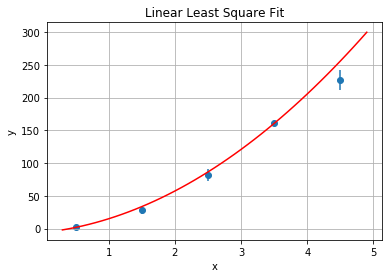

In [28]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed 
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# Fit.py     Linear least square fit; e.g. of matrix computation arrays
	 

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.linalg import solve

x = binsa[:-1]+0.5  # Given x values
y = n*1.      # Given y values
plt.scatter(x, y)                                    # Plot data in blue
sig = np.sqrt(n*1.)      # error bar lenghts
#################
sig[3]=sig[3]/10. ##################################################################
################
plt.errorbar(x,y,yerr=sig, fmt="none")                                    # Plot error bars
plt.title('Linear Least Square Fit')                     # Plot figure
plt.xlabel( 'x' )                                        # Label axes
plt.ylabel( 'y' )
plt.grid(True)                                           # plot grid
Nd = len(x)
A = np.zeros( (3,3), float )                                # Initialize
bvec = np.zeros( (3,1), float )
ss = sx = sxx = sy = sxxx = sxxxx = sxy = sxy = sxxy = 0.

for i in range(0, Nd):                                      
        sig2 = sig[i] * sig[i]
        ss  += 1. / sig2;    sx   += x[i]/sig2;        sy    += y[i]/sig2
        rhl  = x[i] * x[i];  sxx  += rhl/sig2;   sxxy  += rhl * y[i]/sig2
        sxy += x[i]*y[i]/sig2; sxxx +=rhl*x[i]/sig2; sxxxx +=rhl*rhl/sig2
       
A    = np.array([ [ss,sx,sxx], [sx,sxx,sxxx], [sxx,sxxx,sxxxx] ])
bvec = np.array([sy, sxy, sxxy])

#xvec = np.multiply(inv(A), bvec)                             # Invert matrix
Itest = np.dot(A, inv(A))                             # Matrix multiply
#print('\n x vector via inverse')                                       
#print(xvec, '\n')
print('A*inverse(A)')
print(Itest, '\n')

xvec = solve(A, bvec)                             # Solve via elimination
#print('x Matrix via direct') 
#print(xvec, 'end= ') 
print('FitParabola Final Results\n') 
print('y(x) = a0 + a1 x + a2 x^2')                          # Desired fit
print('a0 = %.2f'% xvec[0])                  
print('a1 = %.2f'% xvec[1])
print('a2 = %.2f'% xvec[2], '\n')
#print(' i   xi     yi    yfit   ')
for i in range(0, Nd):
    s = xvec[0] + xvec[1]*x[i] + xvec[2]*x[i]*x[i]
#    print(" %d %5.3f  %5.3f  %8.7f \n"  %(i, x[i], y[i], s))
# red line is the fit, red dots the fits at y[i]
t=np.arange(0.3,5.,0.1)
curve  = xvec[0] + xvec[1]*t + xvec[2]*t**2
plt.plot(t, curve,'r')
plt.yscale('linear')
plt.show()

In [29]:
def chi2(x,y,sig,xvec):
    c2=0.
    for i in range(len(x)):
        c2+=(xvec[0]+xvec[1]*x[i]+xvec[2]*x[i]*x[i]-y[i])**2/sig[i]**2
    return c2
zz=chi2(x,y,sig,xvec)
print('chi2 per degree of freedom is %2.2f'% (zz/(Nd-3)))


chi2 per degree of freedom is 2.57


So we see the fit is not as good, which is to be expected. The artificially (incorrectly) reduced error bar on the 4th point pulls the fit toward that point (giving it too much weight), and thereby pulling the fit away from the other points, increasing the $\chi^2$.

BTW, if you rerun the MC generation, particularly with fewer numbers, you'll find the first bin (or two) might have zero entries. The above code doesn't handle that well. What should you do in that case?

### Nonlinear, general fits

If the theoretical function $g(x, a_m)$ is not a linear function of the parameters $a_m$, then the equations that
result from minimizing $\chi^2$ are not linear equations and so
cannot be solved by the techniques of *linear* algebra (matrix methods).

Typically we use methods that sense the gradient in the neighborhood of the variable which we are minimizing.

Best to use canned algorithms for this. There are many. 
* For example, see [scipy.optimize.curvefit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit). 
  * **See the bottom of this notebook for some experimentation**
* Many of us have a long-standing relationship with [Minuit](http://hep.fi.infn.it/minuit.pdf), which is a standard in particle physics, and which is [updated and maintained](https://root.cern.ch/guides/minuit2-manual) at CERN. There is a pythonized version, [iminuit](https://github.com/scikit-hep/iminuit).

Important:
* as with the linear fit (or even more so), we are interested in the uncertainty in the resulting fit values for the parameters. Here, the fit program typically walks the parameter value away from the optimal until $\chi^2$ has changed by the relevant amount (corresponding to 1 sigma).
* this leads to the subject of multi-parameter *covariance*. The covariance matrix is usually an output of the fit method. See the documentation. 
* for tricky functions, you might want to supply the 1st (gradient) and second (Hessian matrix) derivatives.
* you can also bound the parameter values. Why would you want to do that?
* you can often give an initial step size, to coax the fitter to explore a reasonable range of parameter space if you are encountering problems.

There's more here than we can cover in this survey course. If your project involves this type of fit, that's great, but we should discuss your plans.

# The Method of Maximum Likelihood 

Very often, data contain both a signal we are seeking along with backgrounds. 
* Some examples?
In these cases, it's common to construct a model whose parameters we fit to the data. In this way, we can extract the signal characteristics or set upper limits on the presence of the signal.

**Example**: In particle physics, an "event" is when a collision reaction results in a set of particles that leave signals in the detector that satisfy pre-defined criteria. Usually, we can only classify events statistically.
* Signal and background events don't usually separate completely, and the event sample contains both.

------
------

### Application to Higgs Boson search

An example from J. Nielsen.

If we have some way to estimate the expected background contribution $b$, then we can use the observed number of data events $n$ to provide an estimate of the number of signal events $s$.

The most likely value of $s$ is the one that maximizes the likelihood function based on the Poisson probability:

$$L(n,s,b) = \frac{e^{-s-b} (s+b)^n}{n!}$$

It is more common to minimize $-\ln L$ in this calculation.

$$\ln L(n,s) = -s -b + n\ln(s+b) - \ln n!$$
$$-\ln L(n,s) = s +b - n\ln(s+b) + \ln n!$$

In this case, we can even calculate the derivative analytically:

$$\frac{\partial \ln L}{\partial s} = -1 + \frac{n}{s+b}$$



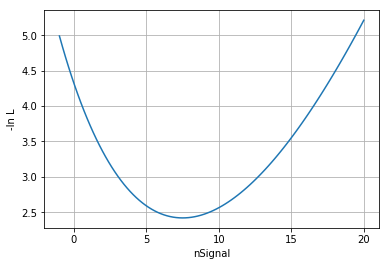

In [72]:
from math import factorial
def lnL(n, s, b):
    return s + b - n*np.log(s+b) + np.log(factorial(n))

def dlnLds(n, s, b):
    return 1 - n/(s+b)

# some tests of the functions
#print(lnL(3, 1.0, 1.9))
#print(dlnLds(3, 1.0, 1.9))

nobs = 20
nbkg = 12.5
svalues = np.linspace(-1., 20., 100)
plt.plot(svalues, lnL(nobs, svalues, nbkg))
plt.xlabel('nSignal')
plt.ylabel('-ln L')
plt.grid(); plt.show()

The `nSignal` value that minimizes $-\ln L$ is the most probable value.
It is useful to know that $\pm 1 \sigma$ corresponds to 0.5 units of $\ln L$ above the minimum.
How can we find the correct measurement, with uncertainties?
Clearly we should look for the point where $\partial \ln L/\partial s = 0$. A root-finding exercise!

In [73]:
s = 0.
ds = 0.01
eps = 0.01
imax = 10

# Find the most probable value using Newton-Raphson
for it in range(0, imax + 1):
    F = dlnLds(nobs, s, nbkg)
    if ( abs(F) <= eps ):                         # Check for convergence
        print("Root found at s = %.5f, F = %.5e, tolerance eps = %e" % (s, F, eps)) 
        break
    print("Iteration ", it, " s = ", s, ", dlnLds(s) = ", F)
    df = (dlnLds(nobs, s + ds, nbkg) - dlnLds(nobs, s, nbkg))/ds  # we're looking for the zero in the derivative fn
    ds = - F/df 
    s += ds                                               # New guess
    
signal_mpv = s

Iteration  0  s =  0.0 , dlnLds(s) =  -0.6000000000000001
Iteration  1  s =  4.691249999999595 , dlnLds(s) =  -0.16338253471972486
Iteration  2  s =  7.764373593749924 , dlnLds(s) =  0.013046225807417211
Root found at s = 7.45588, F = -2.21074e-03, tolerance eps = 1.000000e-02


In [80]:
# Now find the places where ln L changes by 0.5 units.
minL = lnL(nobs, signal_mpv, nbkg)
print("minL value is", minL)

def f(s):
    return lnL(nobs, s, nbkg) - minL - 0.5

def bisection(xminus, xplus, Nmax, eps):       # x-,x+ Nmax error
    for it in range(0,Nmax):
        x=(xminus+xplus)/2                     # Mid point
        print("iteration %2d: x = %.6f and f(x) = %9.6f" % (it, x, f(x)))
        if (f(xplus)*f(x)>0):                      # Root in other half
            xplus=x                            # Change x+ to x
        else:
            xminus=x                           # Change x- to x
        if(xplus-xminus<eps):                           # Converged?
            print("root found with precision eps = ",eps)
            break
        if it==Nmax-1:
             print("root not found after Nmax iterations ")   
    return x

errl=signal_mpv-bisection(-1., signal_mpv, 1000, 0.01)
erru=bisection(signal_mpv, 40., 1000, 0.01)-signal_mpv

print('\n The fitted value for the Higgs signal is %.2f + %.2f - %.2f events '%(signal_mpv,errl,erru))

minL value is 2.4210197197660364
iteration  0: x = 3.227941 and f(x) =  0.033761
iteration  1: x = 5.341912 and f(x) = -0.374497
iteration  2: x = 4.284927 and f(x) = -0.210102
iteration  3: x = 3.756434 and f(x) = -0.098745
iteration  4: x = 3.492188 and f(x) = -0.035222
iteration  5: x = 3.360065 and f(x) = -0.001424
iteration  6: x = 3.294003 and f(x) =  0.015994
iteration  7: x = 3.327034 and f(x) =  0.007241
iteration  8: x = 3.343549 and f(x) =  0.002897
iteration  9: x = 3.351807 and f(x) =  0.000734
root found with precision eps =  0.01
iteration  0: x = 23.727941 and f(x) =  3.845924
iteration  1: x = 15.591912 and f(x) =  0.796875
iteration  2: x = 11.523897 and f(x) = -0.142487
iteration  3: x = 13.557905 and f(x) =  0.266078
iteration  4: x = 12.540901 and f(x) =  0.045287
iteration  5: x = 12.032399 and f(x) = -0.052897
iteration  6: x = 12.286650 and f(x) = -0.004857
iteration  7: x = 12.413776 and f(x) =  0.019955
iteration  8: x = 12.350213 and f(x) =  0.007483
iteratio

------
------



Notice the method naturally gives asymmetric errors
* look at the likelihood function above.


Multi-dimensional likelihood fitting is common. Computationally, it is sometimes advantageous to "bin" the data. See, for example, the [Fermi LAT science tools](https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/help/gtlike.txt) description.

-------
--------
-------

Let's circle back to our linear fit of the generated MC data. What fit parameters did we expect to extract? 

Remember, the value in each bin is the integral of the probability density, $Ax^2$, over the bin. In other words, it should be $$NA\left (\frac{(x+d)^3}{3}-\frac{x^3}{3}\right )$$ where $x$ is the value of the lower edge of the bin, $d$ is the bin width, which in this case is 1, $A=\frac{3}{5^3}$ and $N=500$ was the number of generated events. However, we set the fit to put the $x$ points at the center of the bin, so, the expected function should be:

In [4]:
from sympy import *
init_printing(use_unicode=True)
x=symbols('x') # tell sympy about the symbols we want to use
simplify((500/(5**3)*((x+1/2)**3-(x-1/2)**3)))

So no linear term. Plot this function, and we'll see it's very sensible. 

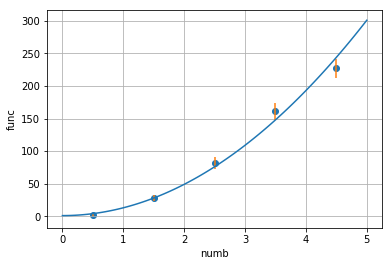

In [64]:
numb = np.linspace(0., 5., 100)
plt.plot(numb, 12.*numb**2+1.)
plt.scatter(x, y)                                    # Plot data in blue
sig = np.sqrt(n*1.)      # error bar lenghts
plt.errorbar(x,y,yerr=sig, fmt="none")                                    # Plot error bars
plt.xlabel('numb')
plt.ylabel('func')
plt.grid(); plt.show()

In [69]:
# now use scipy's curvefit, which will also tell us the errors in the fit and the covariance.
import scipy.optimize as sop
def myfun(xvs,a1,a2,a3):
    return a1+a2*xvs+a3*xvs**2

x = binsa[:-1]+0.5  # Given x values
y = n*1.      # Given y values
sig = np.sqrt(n*1.)      # error bar lenghts

popt,pcov=sop.curve_fit(myfun,x,y, sigma=sig)


In [70]:
# popt gives the optimized parameters (recall a1+x2*x+a3*x**2)
popt

array([-5.32347317,  9.52368428,  9.83727755])

This is extremely close to the parameter values we obtained from our own least-squares fitter (before we tampered with the errors). Good. What about the errors, indicated by the covariance matrix?

In [71]:
pcov

array([[ 15.0341392 , -27.64025381,   6.43842341],
       [-27.64025381,  57.6529113 , -13.91434745],
       [  6.43842341, -13.91434745,   3.64873151]])

In [72]:
# the errors for the 3 parameters separately are given as the sqrt of each diagonal element
# also, think about the meaning of the off-diagonal elements, including the signs. Why is the matrix symmetric?

for i in range(len(popt)):
    print("for parameter %d the value is %.2f +/- %.2f" %(i, popt[i],np.sqrt(pcov[i,i])))

for parameter 0 the value is -5.32 +/- 3.88
for parameter 1 the value is 9.52 +/- 7.59
for parameter 2 the value is 9.84 +/- 1.91


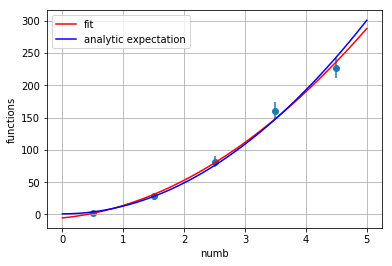

In [73]:
numb = np.linspace(0., 5., 100)
plt.plot(numb, myfun(numb,popt[0],popt[1],popt[2]), 'r', label='fit')
plt.plot(numb, 12.*numb**2+1., 'b', label="analytic expectation")
y = n*1.      # Given y values
plt.scatter(x, y)                                    # Plot data in blue
sig = np.sqrt(n*1.)      # error bar lenghts
plt.errorbar(x,y,yerr=sig, fmt="none")                                    # Plot error bars
plt.xlabel('numb')
plt.ylabel('functions')
plt.legend()
plt.grid(); plt.show()

In [74]:
# now let's redo the fit, but force the linear term coefficient to zero (to see if we get the right value of the other parameters)
popt,pcov=sop.curve_fit(myfun,x,y, sigma=sig,bounds=([-20.,0.,-20.], [30., 1.e-12, 30.]))
for i in range(len(popt)):
    print("for parameter %d the value is %.2f +/- %.2f" %(i, popt[i],np.sqrt(pcov[i,i])))


for parameter 0 the value is -0.76 +/- 5.16
for parameter 1 the value is 0.00 +/- 10.09
for parameter 2 the value is 12.14 +/- 2.54


Notice what we did: we forced the fitter to constrain the value of a2 to be within 1.e-12 of zero using the bounds argument.

The result is, given the errors, very similar to the analytic expectation of $12x^2+1$. Good...

Plotting: 

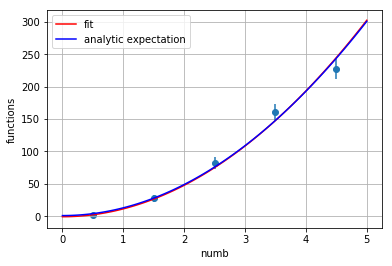

In [75]:
numb = np.linspace(0., 5., 100)
plt.plot(numb, myfun(numb,popt[0],popt[1],popt[2]), 'r', label='fit')
plt.plot(numb, 12.*numb**2+1., 'b', label="analytic expectation")
y = n*1.      # Given y values
plt.scatter(x, y)                                    # Plot data in blue
sig = np.sqrt(n*1.)      # error bar lenghts
plt.errorbar(x,y,yerr=sig, fmt="none")                                    # Plot error bars
plt.xlabel('numb')
plt.ylabel('functions')
plt.legend()
plt.grid(); plt.show()

So, we really should have made this a two-parameter fit from the beginning -- there was no theoretical basis for the linear term, and it turns out we did not need it. Adding it just distorted the extracted values of the other two parameters.

Discussion:
* What could we do to reduce the size of the error bars on the fitted parameters?